# Fashion-MNIST with tf.keras

Welcome! In this lab, you'll learn how to train an image classifier train on the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) using TensorFlow 2. You'll go through all the steps, including loading the data, building and training a model, calculating the accuracy, and making predictions. Our focus here is on the code.

The biggest change to TensorFlow is that it runs with eager execution by default.

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

import numpy as np

TensorFlow 2.x selected.


In [3]:
tf.__version__

'2.1.0'

### Step 1: Download the dataset

The Fashion-MNIST dataset contains thousands of grayscale images of Zalando fashion articles.

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Step 2) Understand the data format

We are given the images as a 3-D array of integer values that is of shape (*N*, 28, 28), where *N* is the number of images in the training or test set. The labels are 1-D array of the integer values of each image.

In [5]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### Step 3) Visualize the data
Let's see how the images look. This function shows a random example along with it's corresponding label.

Label: 5


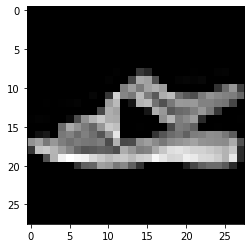

In [6]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

i = random.randint(0, 100)

print("Label: %s" % train_labels[i])
plt.imshow(train_images[i], cmap='gray')

Each training and test example is assigned one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

### Step 4) Reformat the images
Here, we'll flatten (or unstack) the images. There are deep learning techniques that work with 2d images directly (rather than their flattened representation), but we'll start with this format. Instead of working with a 28 by 28 *image*, we'll unstack it into a 28 \* 28 = 784 length *array*.

* We want to convert the 3-D array of shape (*N*, 28, 28) to a 2-D array of shape (*N*, 784) where the second dimension is just an array of all the pixels in an image. This is called flattening, or unstacking, the images. 
* We also want to convert the pixel values from a number between 0 and 255 to a number between 0 and 1.

In [0]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

# Reshape from (N, 28, 28) to (N, 28*28=784)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))

# Convert the array to float32 as opposed to uint8
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
train_images /= 255
test_images /=  255

### Step 5) Reformat the labels

Next, we want to convert the labels from an integer format (e.g., "2" or "Pullover"), to a [one hot encoding](https://en.wikipedia.org/wiki/One-hot) (e.g., "0, 0, 1, 0, 0, 0, 0, 0, 0, 0"). To do so, we'll use the `tf.keras.utils.to_categorical` [function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function.

In [8]:
NUM_CAT = 10

print("Before", train_labels[0]) # The format of the labels before conversion

train_labels  = tf.keras.utils.to_categorical(train_labels, NUM_CAT)

print("After", train_labels[0]) # The format of the labels after conversion

test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CAT)

Before 9
After [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Step 6) Build the model

Now, we'll create our neural network using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). Keras is a high-level API to build and train deep learning models and is user friendly, modular and easy to extend. `tf.keras` is TensorFlow's implementation of this API and it supports such things as eager execution, `tf.data` pipelines and Estimators.

Architecture wise, we'll use a single hidden layer network, where:
* The hidden layer will have 512 units using the [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu) activation function. 
* The output layer will have 10 units and use [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) function. 
* Notice, we specify the input shape on the first layer. If you add subsequent layers, this is not necessary.  
* We will use the [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy) loss function, and the [SGD  optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/).

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(NUM_CAT, activation=tf.nn.softmax))

# We will now compile and print out a summary of our model
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Step 7) Training

Next, we will train the model by using the [fit method](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) for 5 [epochs](https://www.quora.com/What-is-epochs-in-machine-learning). We will keep track of the training loss and accuracy as we go. Please be patient as this step may take a while depending on your hardware.

In [10]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.5175 - accuracy: 0.8165
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3851 - accuracy: 0.8600
Epoch 3/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3467 - accuracy: 0.8734
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3209 - accuracy: 0.8824
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3043 - accuracy: 0.8880


### Step 8) Testing
Now that we have trained our model, we want to evaluate it. Sure, our model is >88% accurate on the training set, but what about on data it hasn't seen before? The test accuracy is a good metric for that.

In [11]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy: %.2f' % (accuracy))

10000/10000 [==============================] - 1s 86us/sample - loss: 0.3447 - accuracy: 0.8745
Test accuracy: 0.87


## To Do
Congrats! You have successfully used TensorFlow Keras to train a model on the Fashion-MNIST dataset.
Now, try with different hyperparameters such as:
- Number of neurons in a layer
- Number of layers
- Learning rate
- Different optimizer
- Number of epochs

## Question
What happens if you use sigmoid activation function instead of softmax activation?
How are they different?
Wihch activation function should you use for this case, and which can you use for another case? (give an example)